In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv('teams.csv')

In [3]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [8]:
new_df = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   prev_medals  2014 non-null   float64
 6   medals       2144 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 117.4+ KB


In [10]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2144.0,1994.507463,15.384205,1964.0,1984.000,1996.0,2008.00,2016.0
athletes,2144.0,73.693097,127.907577,1.0,7.000,19.0,70.25,839.0
age,2144.0,24.778591,2.808559,17.0,23.275,24.7,26.10,66.0
prev_medals,2014.0,10.248759,31.951920,0.0,0.000,0.0,4.00,442.0
medals,2144.0,10.556437,33.028143,0.0,0.000,0.0,4.00,442.0


In [11]:
new_df.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [12]:
import seaborn as sns

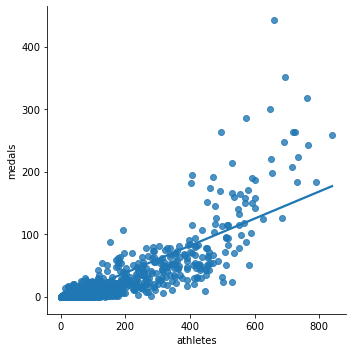

In [17]:
_ = sns.lmplot(x = 'athletes', y = 'medals', data = new_df, fit_reg = True, ci = None)

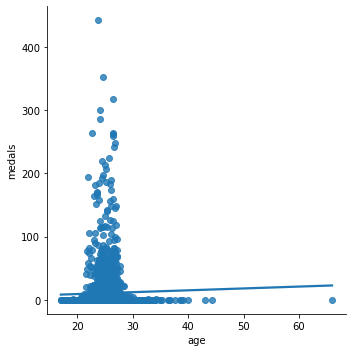

In [18]:
_ = sns.lmplot(x = 'age', y = 'medals', data = new_df, fit_reg = True, ci = None) #No linear relationship

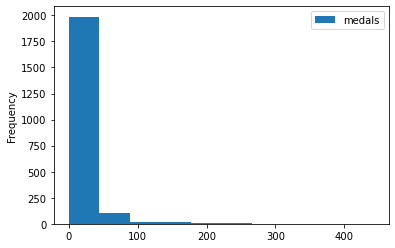

In [22]:
_ = new_df.plot.hist(y = 'medals')

In [23]:
#Check total missing values 
new_df.isnull().sum()

team             0
country          0
year             0
athletes         0
age              0
prev_medals    130
medals           0
dtype: int64

In [28]:
#Checking missing values in %
new_df.isna().mean().mul(100).round(2)

team           0.00
country        0.00
year           0.00
athletes       0.00
age            0.00
prev_medals    6.06
medals         0.00
dtype: float64

In [29]:
new_df = new_df.dropna() #dropping missing values

In [30]:
new_df.isnull().sum()

team           0
country        0
year           0
athletes       0
age            0
prev_medals    0
medals         0
dtype: int64

In [31]:
train = new_df[new_df['year'] < 2012].copy()
test = new_df[new_df['year'] >= 2012].copy()

In [34]:
train.shape

(1609, 7)

In [35]:
test.shape

(405, 7)

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [37]:
#Train a linear regression  model to use the predictors to predict the target variable 
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [38]:
reg.fit(train[predictors], train['medals'])

LinearRegression()

In [39]:
predictions = reg.predict(test[predictors])

In [41]:
test['predictions'] = predictions

In [42]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [43]:
#index test df, locate rows predictions where  value is negative, replacing it with a 0
test.loc[test['predictions'] < 0, "predictions"] = 0 

In [45]:
test['predictions'] = test['predictions'].round()

In [46]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [47]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])

In [49]:
error

3.2987654320987656

On average, we were within  3.3 metals of how many metals a team actually  won in the olympics 

In [50]:
new_df.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [53]:
#Percentage-wise, we're not far off
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [54]:
#Potentally problematic for countries who don't send many athletes to participate
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [56]:
#difference between our predicted number of medals and our actual number of medals
errors = (test['medals'] - test['predictions']).abs()

In [58]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [59]:
"""
finding the mean  error for teams to see 
how many metals off we were on average for each country
"""
error_by_team = errors.groupby(test['team']).mean()

In [60]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [64]:
#how many medals each team earned on average
medals_by_team = test['medals'].groupby(test['team']).mean()

In [65]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [66]:
error_ratio = error_by_team / medals_by_team

In [67]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [68]:
#removing NaN values
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [71]:
#Removing infinite values
import numpy as np

error_ratio = error_ratio[np.isfinite(error_ratio)]

In [72]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

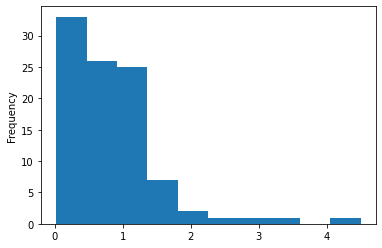

In [73]:
_ = error_ratio.plot.hist()

## Final Thoughts

After plotting the histogram, an error ratio of 0 to 0.5 means that we are within 50%  of the actual metal count. However, in some  cases here error ratio is 2 and above , which means that our predictions were twice  as high as the predicted metals or half of  the predicted metals so it means that we're pretty  far off the true value. Obviously, with the number of athletes as a predictor, the model produces a value close to the true value and more importantly, our error is pretty low. In other words, countries with more number of athletes, produce more number of medals. Going forward, I will add more predictors to the model or try a different machine learning algorithm to produce a more accurate model.